In [49]:
import numpy as np
import math
from numpy.linalg import pinv
from matplotlib import pyplot

In [94]:
def solveGrad(X, y, testX, testy, alpha, iters, step):
    n, m = X.shape
    b = np.zeros(m)
    trainNRMSE = []
    testNRMSE = []
    for it in range(iters):
        b -= alpha * grad(X, y, b)
        if it != 0 and it % step == 0: 
            trainNRMSE.append(nrmse(X, y, b))
            testNRMSE.append(nrmse(testX, testy, b))
    return trainNRMSE, testNRMSE

In [35]:
def grad(X, y, b):
    return 2 * X.T.dot(X.dot(b) - y)

In [39]:
def energy(X, y, b):
    return np.square(X.dot(b) - y).mean()

In [46]:
def nrmse(X, y, b):
    return math.sqrt(energy(X, y, b)) / np.max(y)

In [9]:
def readDatasets(file):
    f = list(open(file, 'r'))
    n = int(f[0])
    m = int(f[1])
    k = int(f[m + 2])
    
    trainData = np.array([[int(j) for j in np.array(f[i + 2].split(' '))] for i in range(m)])
    testData = np.array([[int(j) for j in np.array(f[i + m + 3].split(' '))] for i in range(k)])
    
    trainX, trainy = trainData[:,:-1], trainData[:,n]
    testX, testy = testData[:,:-1], testData[:,n]
    
    return trainX, trainy, testX, testy, n

In [99]:
def solveInv(file):
    trainX, trainy, testX, testy, n = readDatasets(file)
    
    b = pinv(trainX).dot(trainy)
    return nrmse(trainX, trainy, b), nrmse(testX, testy, b)

In [107]:
def drawGrad(file, alpha):
    trainX, trainy, testX, testy, n = readDatasets(file)
    
    iters = 5000
    step  = 100
    
    trainNRMSE, testNRMSE = solveGrad(trainX, trainy, testX, testy, alpha, iters, step)
    pyplot.plot(range(step, iters, step), trainNRMSE)
    pyplot.plot(range(step, iters, step), testNRMSE, color='red')
    
    invTrainNRMSE, invTestNRMSE = solveInv(file)
    print(invTrainNRMSE)
    print(invTestNRMSE)
    
    pyplot.plot([step, iters - 2 * step], [invTrainNRMSE, invTrainNRMSE], color = 'green')
    pyplot.plot([step, iters - 2 * step], [invTrainNRMSE, invTrainNRMSE], color = 'black')
    pyplot.show()

def drawGrads(alpha):
    files = ['LR/1.txt', 'LR/2.txt', 'LR/3.txt', 'LR/4.txt', 'LR/5.txt', 'LR/6.txt', 'LR/7.txt']
    for file in files:
        drawGrad(file, alpha)

8.720894300423417e-05
7.245729560966613e-05


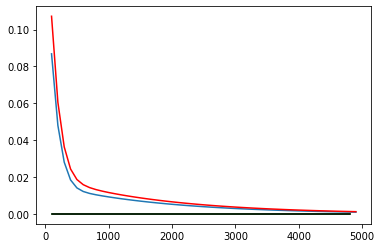

4.265512892593658e-05
1.0996268134337443e-05


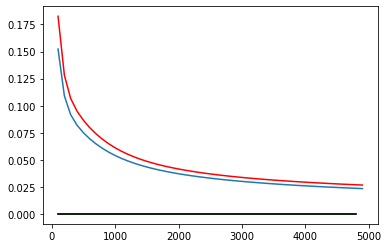

-0.0005160203786311026
0.10108635544456955


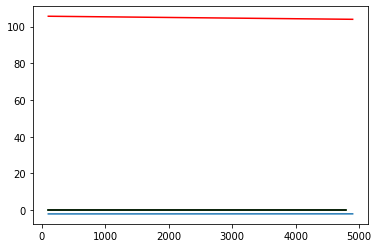

0.0009576474273572078
0.0001909772729430047


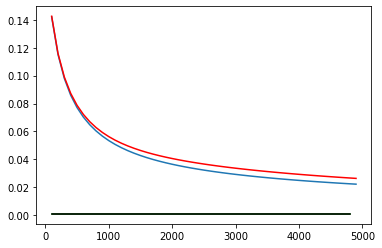

2.946212829759154e-08
7.404405044186324e-08


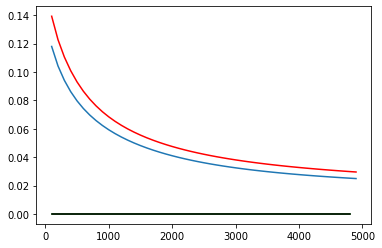

0.000435015279132457
0.0005462057815151664


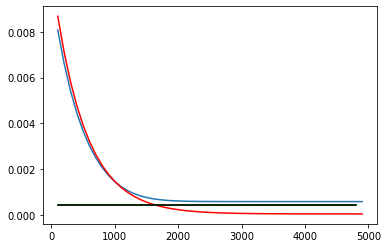

3.721458912268235e-06
9.93017624891677e-07


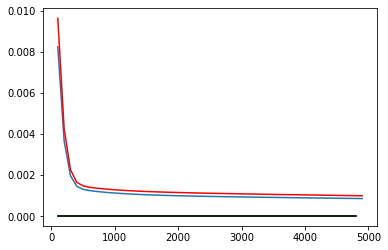

In [108]:
drawGrads(1e-19)

8.720894300423417e-05
7.245729560966613e-05


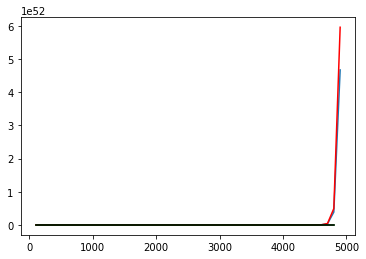

4.265512892593658e-05
1.0996268134337443e-05


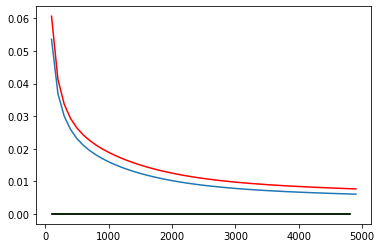

-0.0005160203786311026
0.10108635544456955


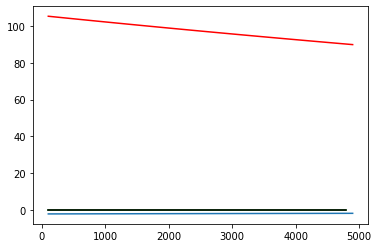

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  


0.0009576474273572078
0.0001909772729430047


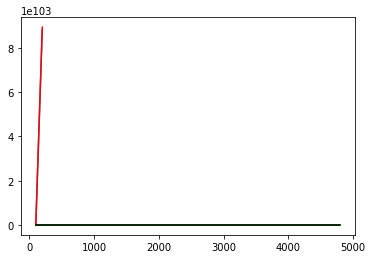

2.946212829759154e-08
7.404405044186324e-08


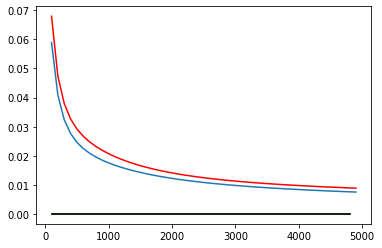

0.000435015279132457
0.0005462057815151664


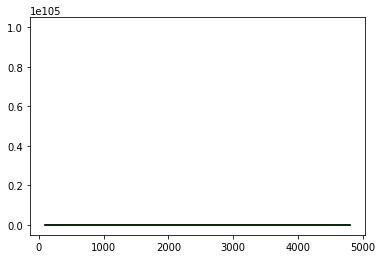

3.721458912268235e-06
9.93017624891677e-07


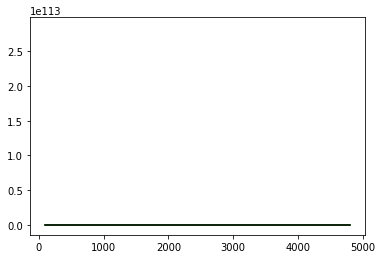

In [109]:
drawGrads(1e-18)

8.720894300423417e-05
7.245729560966613e-05


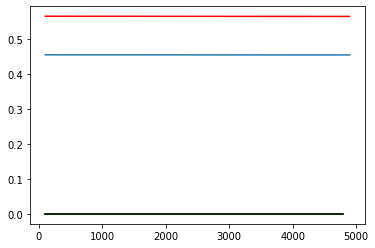

4.265512892593658e-05
1.0996268134337443e-05


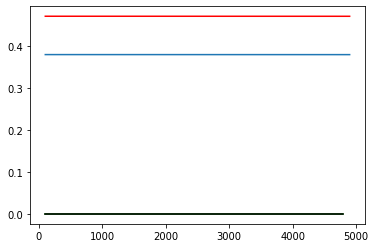

-0.0005160203786311026
0.10108635544456955


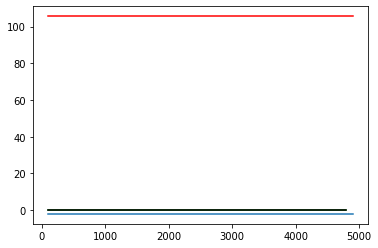

0.0009576474273572078
0.0001909772729430047


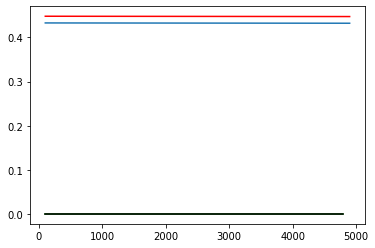

2.946212829759154e-08
7.404405044186324e-08


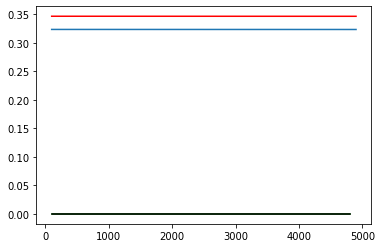

0.000435015279132457
0.0005462057815151664


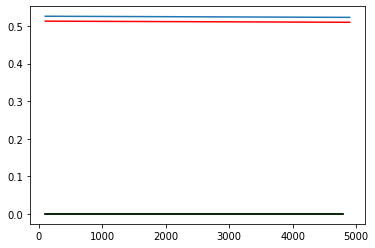

3.721458912268235e-06
9.93017624891677e-07


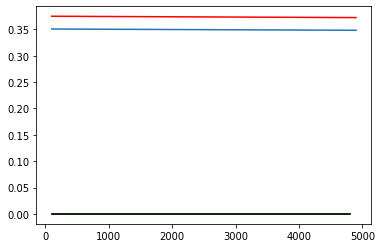

In [110]:
drawGrads(1e-25)

8.720894300423417e-05
7.245729560966613e-05


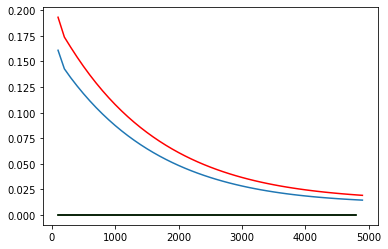

4.265512892593658e-05
1.0996268134337443e-05


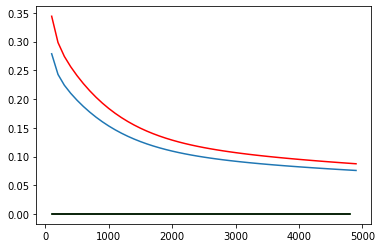

-0.0005160203786311026
0.10108635544456955


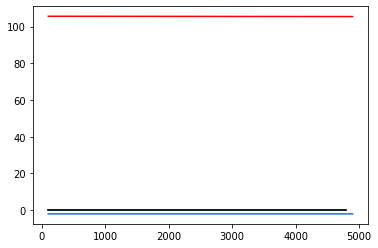

0.0009576474273572078
0.0001909772729430047


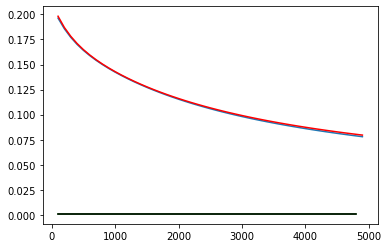

2.946212829759154e-08
7.404405044186324e-08


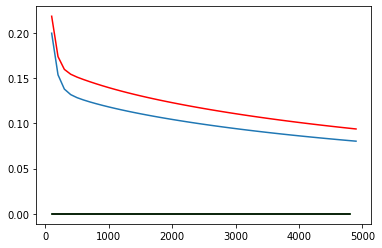

0.000435015279132457
0.0005462057815151664


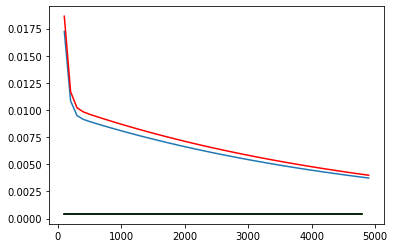

3.721458912268235e-06
9.93017624891677e-07


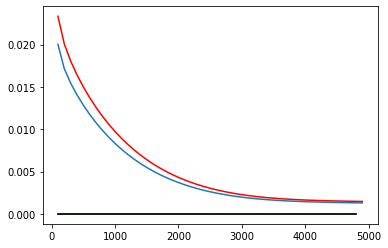

In [111]:
drawGrads(1e-20)

-0.0005160203786311026
0.10108635544456955


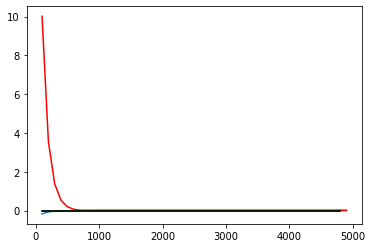

In [115]:
drawGrad('LR/3.txt', 1e-15)